<a href="https://colab.research.google.com/github/sopayan/pacmann_project/blob/main/Diabetes_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Diabetes merupakan sumber dari segala penyakit di era modern
Diabetes disebabkan oleh kegagalan pankreas dalam menghasilkan insulin untuk menurunkan kadar gula dalam darah. Meningkatnya kadar gula dalam darah dapat menyebabkan menurunnya kinerja organ-organ dalam tubuh.

Machine learning dapat digunakan untuk memprediksi diabetes

This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset




*   Age = Umur pasien 1. 20-65
*   Gender = Jenis kelamin 1. Male, 2.Female
*   Polyuria = Apakah pasien sering buang air kecil 1.Yes, 2.No.

*   Polydipsia = apakah pasien sering merasa haus 1.Yes, 2.No.
*   sudden weight loss = apakah pasien mengalami penurunan berat badan mendadak 1.Yes, 2.No.
*   weakness = apakah pasien merasa lemas 1.Yes, 2.No.
*   Polyphagia = rasa lapar berlebih 1.Yes, 2.No.
*   Genital thrush 1.Yes, 2.No.
*   visual blurring 1.Yes, 2.No.
*   Itching 1.Yes, 2.No.
*   Irritability 1.Yes, 2.No.
*   delayed healing 1.Yes, 2.No.
*   partial paresis 1.Yes, 2.No.
*   muscle stifness 1.Yes, 2.No.
*   Alopecia 1.Yes, 2.No.
*   Obesity 1.Yes, 2.No.
*   Class 1.Positive, 2.Negative.

In [ ]:
# Load data manipulation package
import numpy as np
import pandas as pd
import itertools

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Load Statistics package
from scipy.stats import f_oneway
import scipy.stats as stats
import statsmodels.api as sm

# Load model package
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import metrics package
from sklearn import metrics
from sklearn.metrics import average_precision_score

In [ ]:
data = pd.read_csv('diabetes_data_upload.csv')
data.head().T

,0,1,2,3,4
Age,40,58,41,45,60
Gender,Male,Male,Male,Male,Male
Polyuria,No,No,Yes,No,Yes
Polydipsia,Yes,No,No,No,Yes
sudden weight loss,No,No,No,Yes,Yes
weakness,Yes,Yes,Yes,Yes,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,Yes,No,No,Yes
Itching,Yes,No,Yes,Yes,Yes


In [ ]:
data.shape

(520, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

# Sample splitting

In [ ]:
# Define the response variable
response_variable = 'class'

# Split response and predictors
y = data[response_variable]
X = data.drop(columns=[response_variable], axis=1)

# Validate the splitting
print('y shape :', y.shape)
print('X shape :', X.shape)

y shape : (520,)
X shape : (520, 16)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Validate splitting
print('X train shape :', X_train.shape)
print('y train shape :', y_train.shape)
print('X test shape  :', X_test.shape)
print('y test shape  :', y_test.shape)

X train shape : (364, 16)
y train shape : (364,)
X test shape  : (156, 16)
y test shape  : (156,)


# EDA

In [ ]:
# Concatenate X_train and y_train as data_train
data_train = pd.concat((X_train, y_train), axis=1)

# Validate data_train
print('Train data shape:', data_train.shape)
data_train.head().T

Train data shape: (364, 17)


,497,233,116,365,276
Age,47,50,30,45,30
Gender,Male,Male,Female,Female,Male
Polyuria,No,No,Yes,No,No
Polydipsia,No,No,Yes,No,No
sudden weight loss,No,No,Yes,No,No
weakness,No,Yes,No,No,No
Polyphagia,No,No,Yes,Yes,No
Genital thrush,No,No,No,No,No
visual blurring,No,No,No,Yes,No
Itching,No,Yes,No,Yes,No


Predictor 1 Age

In [ ]:
# Descriptive statistics of age
data_train['Age'].describe()

count    364.000000
mean      47.840659
std       12.045913
min       16.000000
25%       39.000000
50%       47.000000
75%       56.000000
max       90.000000
Name: Age, dtype: float64

In [ ]:
# Descriptive of age by response
data_train['Age'].groupby(data_train['class']).describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Negative,140.0,46.164286,12.291783,26.0,36.0,45.0,55.25,72.0
Positive,224.0,48.888393,11.796520,16.0,39.0,48.0,57.00,90.0


<Axes: xlabel='class', ylabel='Age'>

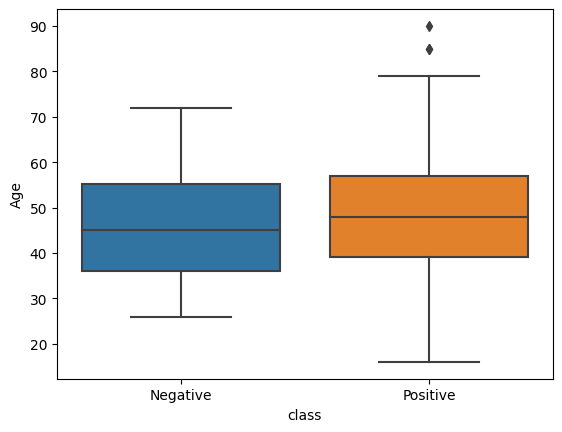

In [ ]:
# Boxplot of age by class
sns.boxplot(data=data_train, x='class', y="Age")

<Axes: xlabel='Age', ylabel='class'>

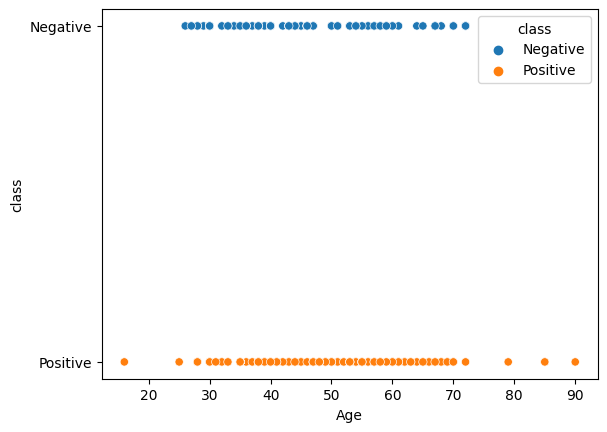

In [ ]:
# Check for the perfect separation
sns.scatterplot(data = data_train,
                x = 'Age',
                y = 'class',
                hue = 'class')

<Axes: xlabel='Age', ylabel='Count'>

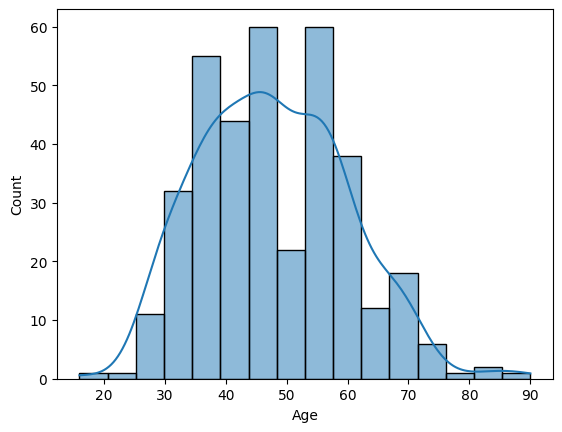

In [ ]:
# Describe distribution of Age
sns.histplot(data=data_train, x='Age',kde = True)

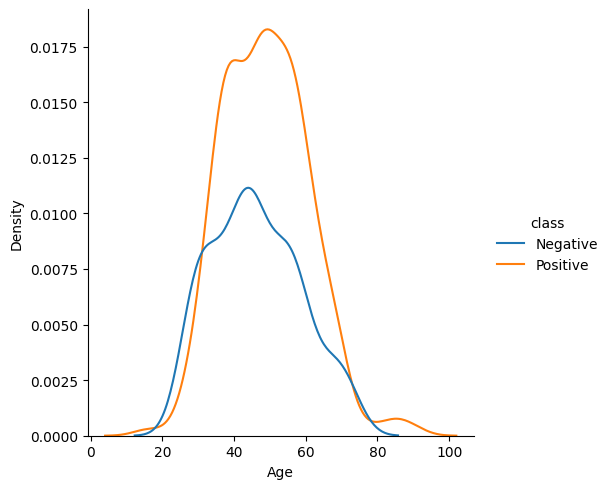

In [ ]:
# Distribution plot of subscription_age by response churn
sns.displot(data = data_train,
            x = 'Age',
            hue = 'class',
            kind = 'kde')

In [ ]:
# Perform one-way ANOVA
group1 = data_train[data_train['class'] == 'Negative']['Age']
group2 = data_train[data_train['class'] == 'Positive']['Age']
f_statistic, p_value = stats.f_oneway(group1, group2)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference in means.")


F-statistic: 4.44783988786985
P-value: 0.03563177255983094
Reject the null hypothesis - There is a significant difference in means.


Predictor 3 Gender

In [ ]:
data_train['Gender'].value_counts(normalize=True)

Male      0.620879
Female    0.379121
Name: Gender, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

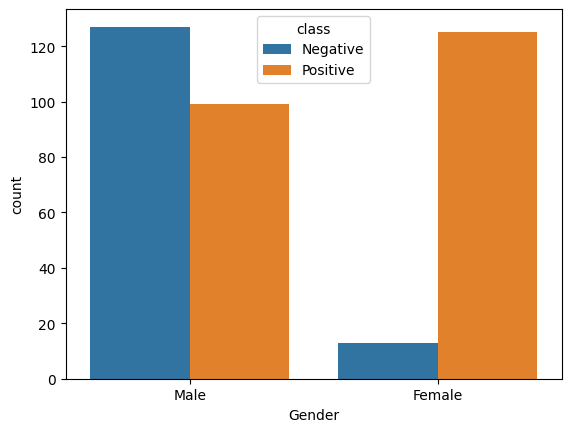

In [ ]:
# Describe proportion of Gender

sns.countplot(data=data_train, x='Gender', hue='class')

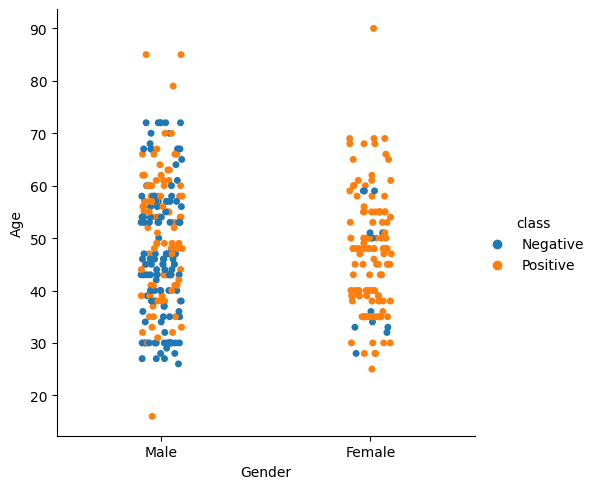

In [ ]:
# Describe dispersion of Age, and correlation with gender & class
sns.catplot(data=data_train, y='Age', x='Gender', hue='class')

In [ ]:
# Contingency table for class by GENDER
crosstab_class_vs_gender = pd.crosstab(data_train['Gender'],
                                       data_train['class'],
                                       margins=False)
crosstab_class_vs_gender

class,Negative,Positive
Gender,,
Female,13,125
Male,127,99


In [ ]:
# Odds of positive diabetes female
odds_female = crosstab_class_vs_gender['Positive']['Female']/crosstab_class_vs_gender['Negative']['Female']

# Odds of positive diabetes male
odds_male = crosstab_class_vs_gender['Positive']['Male']/crosstab_class_vs_gender['Negative']['Male']

print("Odds of positive diabetes from:")
print(f"a female     = {odds_female:.2f}")
print(f"a male = {odds_male:.2f}")

Odds of positive diabetes from:
a female     = 9.62
a male = 0.78


In [ ]:
# OR between Male Positive vs Female
odds_ratio = odds_male/odds_female

print(f"Odds of male patient positive diabetes is {odds_ratio:.2f} times odds for female patient to be positive diabetes.")

Odds of male patient positive diabetes is 0.08 times odds for female patient to be positive diabetes.


In [ ]:
# Create a function of independence test
def independence_test(predictor_label, alpha=0.05):
    """
    Funtion to perform the independence test.

    Parameters
    ----------
    predictor_label : object
      The label of predictor variable.

    alpha : float in range[0,1], default = 0.05
      Probability of Type I Error (reject H0 when H0 is true).

    """
    # Build the contingency table
    crosstab = pd.crosstab(data_train[predictor_label],
                           data_train['class'],
                           margins = False)

    # Test whether class is independent of the predictor
    stats.chi2_contingency(crosstab)

    # Result of independence test
    result = stats.chi2_contingency(crosstab)

    # Extract the test result
    stat = result[0]
    pval = result[1]

    # Print the conclusion
    if pval < alpha:
        print(f"Class and {predictor_label} is not independent with P-val={pval}.")
    else:
        print(f"Class and {predictor_label} is independent with P-val={pval}.")

In [ ]:
# Perform the independence test
independence_test('Gender')

Class and Gender is not independent with P-val=1.516367806966599e-18.


Predictor 4 Polyuria

<Axes: xlabel='Polyuria', ylabel='count'>

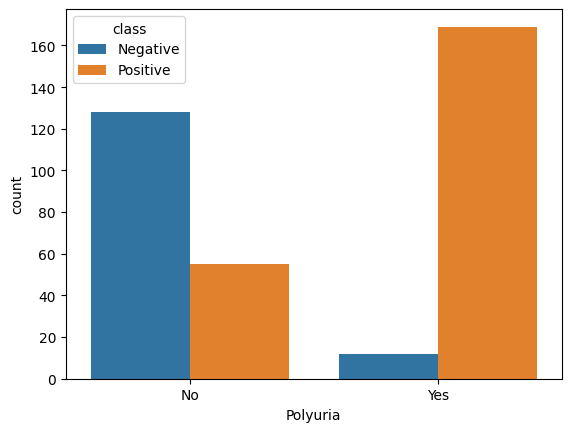

In [ ]:
# Describe proportion of Polyuria
sns.countplot(data=data_train, x='Polyuria', hue='class')

In [ ]:
data_train['Polyuria'].value_counts(normalize=True)

No     0.502747
Yes    0.497253
Name: Polyuria, dtype: float64

In [ ]:
# Perform the independence test
independence_test('Polyuria')

Class and Polyuria is not independent with P-val=8.304976491351907e-35.


Predictor 5 Polydipsia

In [ ]:
data_train['Polydipsia'].value_counts(normalize=True)

No     0.557692
Yes    0.442308
Name: Polydipsia, dtype: float64

<Axes: xlabel='Polydipsia', ylabel='count'>

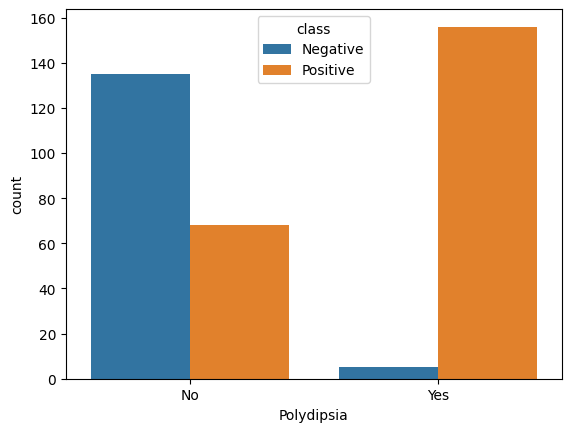

In [ ]:
# Describe proportion of Polydipsia
sns.countplot(data=data_train, x='Polydipsia', hue='class')

In [ ]:
# Perform the independence test
independence_test('Polydipsia')

Class and Polydipsia is not independent with P-val=1.9146061193754525e-34.


Predictor 5 sudden weight loss

<Axes: xlabel='sudden weight loss', ylabel='count'>

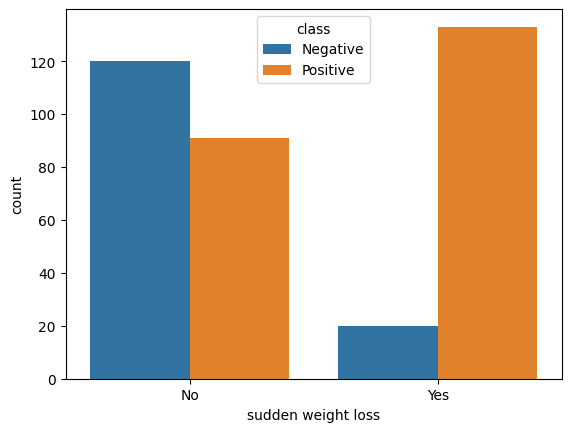

In [ ]:
# Describe proportion of sudden weight loss

sns.countplot(data=data_train, x='sudden weight loss', hue='class')

In [ ]:
data_train['sudden weight loss'].value_counts(normalize=True)

No     0.57967
Yes    0.42033
Name: sudden weight loss, dtype: float64

In [ ]:
# Perform the independence test
independence_test('sudden weight loss')

Class and sudden weight loss is not independent with P-val=5.786888688185539e-17.


Predictor 6 Weakness

<Axes: xlabel='weakness', ylabel='count'>

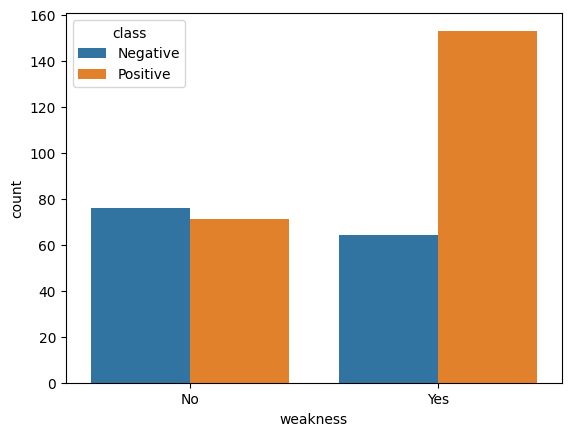

In [ ]:
# Describe proportion of weakness

sns.countplot(data=data_train, x='weakness', hue='class')

In [ ]:
data_train['weakness'].value_counts(normalize=True)

Yes    0.596154
No     0.403846
Name: weakness, dtype: float64

In [ ]:
# Perform the independence test
independence_test('weakness')

Class and weakness is not independent with P-val=3.135308996439705e-05.


Predictor 7 Polyphagia

<Axes: xlabel='Polyphagia', ylabel='count'>

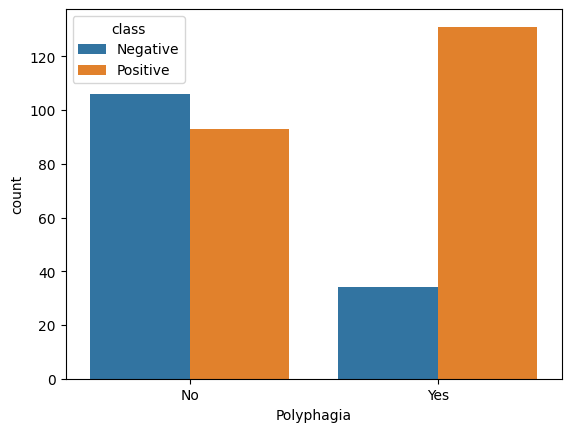

In [ ]:
# Describe proportion of Polyphagia

sns.countplot(data=data_train, x='Polyphagia', hue='class')

In [ ]:
data_train['Polyphagia'].value_counts(normalize=True)

No     0.546703
Yes    0.453297
Name: Polyphagia, dtype: float64

In [ ]:
# Perform the independence test
independence_test('Polyphagia')

Class and Polyphagia is not independent with P-val=3.6611559313678115e-10.


Predictor 8 Genital Thrush

In [ ]:
# Describe proportion of Genital thrush
data_train['Genital thrush'].value_counts(normalize=True)

No     0.78022
Yes    0.21978
Name: Genital thrush, dtype: float64

<Axes: xlabel='Genital thrush', ylabel='count'>

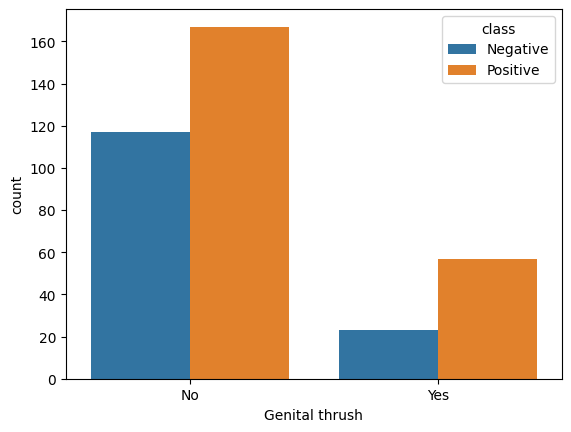

In [ ]:
sns.countplot(data=data_train, x='Genital thrush', hue='class')

In [ ]:
# Perform the independence test
independence_test('Genital thrush')

Class and Genital thrush is independent with P-val=0.05859132827689303.


Predictor 9 Visual blurring

In [ ]:
# Describe proportion of visual blurring
data_train['visual blurring'].value_counts(normalize=True)


No     0.549451
Yes    0.450549
Name: visual blurring, dtype: float64

<Axes: xlabel='visual blurring', ylabel='count'>

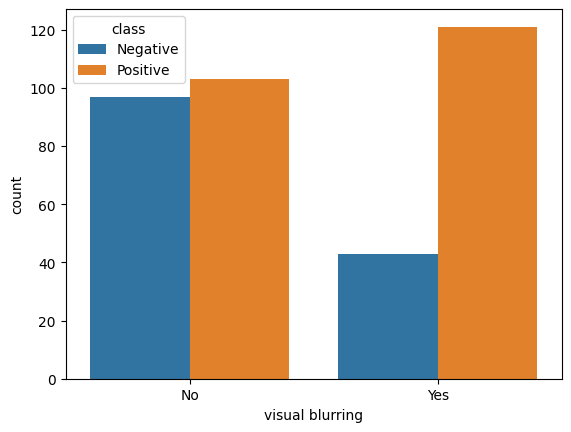

In [ ]:
sns.countplot(data=data_train, x='visual blurring', hue='class')

In [ ]:
# Perform the independence test
independence_test('visual blurring')

Class and visual blurring is not independent with P-val=2.244381772764679e-05.


Predictor 10 Itching

In [ ]:
# Contingency table for Thrush by Itching
crosstab_thrush_vs_itching = pd.crosstab(data_train['Itching'],
                                       data_train['Genital thrush'],
                                       margins=False
                                         )
crosstab_thrush_vs_itching

Genital thrush,No,Yes
Itching,,
No,155,32
Yes,129,48


In [ ]:
# Describe proportion of Itching
data_train['Itching'].value_counts(normalize=True)

No     0.513736
Yes    0.486264
Name: Itching, dtype: float64

<Axes: xlabel='Itching', ylabel='count'>

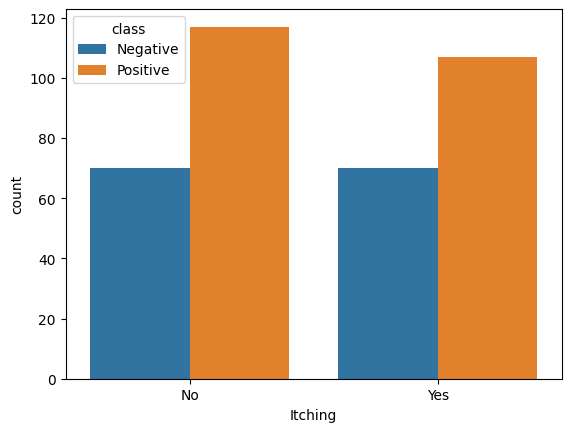

In [ ]:
sns.countplot(data=data_train, x='Itching', hue='class')

In [ ]:
# Perform the independence test
independence_test('Itching')

Class and Itching is independent with P-val=0.7590334446783515.


Predictor 11 Irritability

In [ ]:
# Describe proportion of Irritability
data_train['Irritability'].value_counts(normalize=True)

No     0.777473
Yes    0.222527
Name: Irritability, dtype: float64

<Axes: xlabel='Irritability', ylabel='count'>

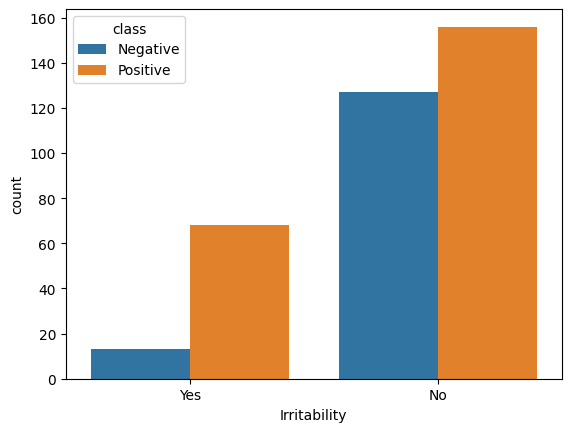

In [ ]:
sns.countplot(data=data_train, x='Irritability', hue='class')

In [ ]:
# Perform the independence test
independence_test('Irritability')

Class and Irritability is not independent with P-val=4.816015344527309e-06.


Predictor 12 delayed healing

In [ ]:
# Describe proportion of delayed healing
data_train['delayed healing'].value_counts(normalize=True)


No     0.538462
Yes    0.461538
Name: delayed healing, dtype: float64

<Axes: xlabel='delayed healing', ylabel='count'>

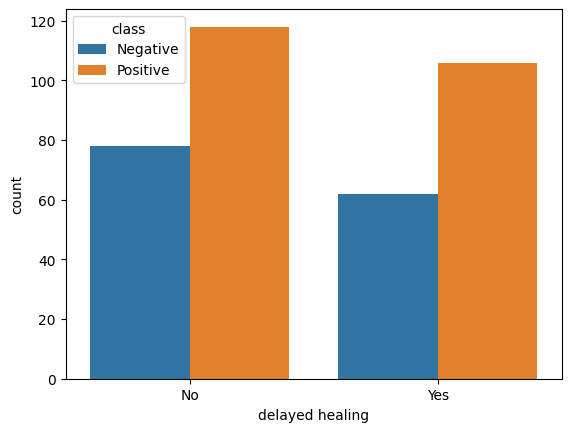

In [ ]:
sns.countplot(data=data_train, x='delayed healing', hue='class')

In [ ]:
# Perform the independence test
independence_test('delayed healing')

Class and delayed healing is independent with P-val=0.6475541633568076.


Predictor 13 partial paresis

In [ ]:
# Describe proportion of partial paresis
data_train['partial paresis'].value_counts(normalize=True)

No     0.571429
Yes    0.428571
Name: partial paresis, dtype: float64

<Axes: xlabel='partial paresis', ylabel='count'>

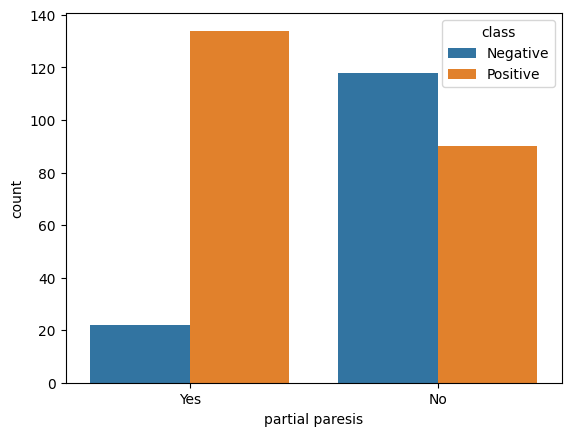

In [ ]:
sns.countplot(data=data_train, x='partial paresis', hue='class')

In [ ]:
# Perform the independence test
independence_test('partial paresis')

Class and partial paresis is not independent with P-val=3.241920057555087e-16.


Predictor 14 muscle stiffness

In [ ]:
# Describe proportion of muscle stiffness
data_train['muscle stiffness'].value_counts(normalize=True)

No     0.626374
Yes    0.373626
Name: muscle stiffness, dtype: float64

<Axes: xlabel='muscle stiffness', ylabel='count'>

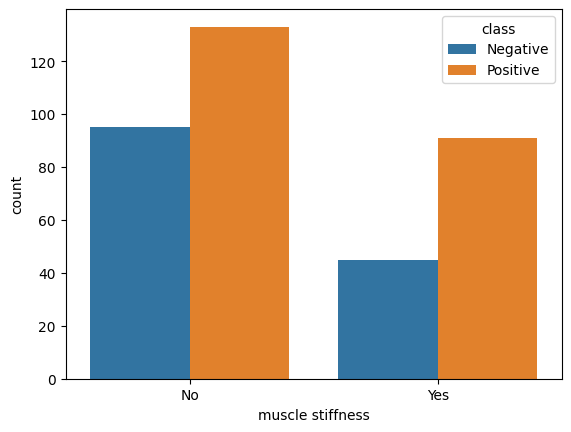

In [ ]:
sns.countplot(data=data_train, x='muscle stiffness', hue='class')

In [ ]:
# Perform the independence test
independence_test('muscle stiffness')

Class and muscle stiffness is independent with P-val=0.12949473783069673.


Predictor 15 Alopecia

In [ ]:
# Describe proportion of Alopecia
data_train['Alopecia'].value_counts(normalize=True)

No     0.673077
Yes    0.326923
Name: Alopecia, dtype: float64

<Axes: xlabel='Alopecia', ylabel='count'>

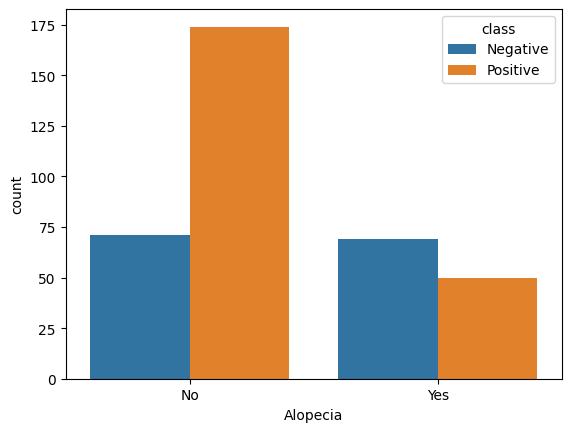

In [ ]:
sns.countplot(data=data_train, x='Alopecia', hue='class')

In [ ]:
# Perform the independence test
independence_test('Alopecia')

Class and Alopecia is not independent with P-val=1.7833002457927044e-07.


Predictor 16 Obesity

In [ ]:
# Describe proportion of Obesity
data_train['Obesity'].value_counts(normalize=True)

No     0.815934
Yes    0.184066
Name: Obesity, dtype: float64

<Axes: xlabel='Obesity', ylabel='count'>

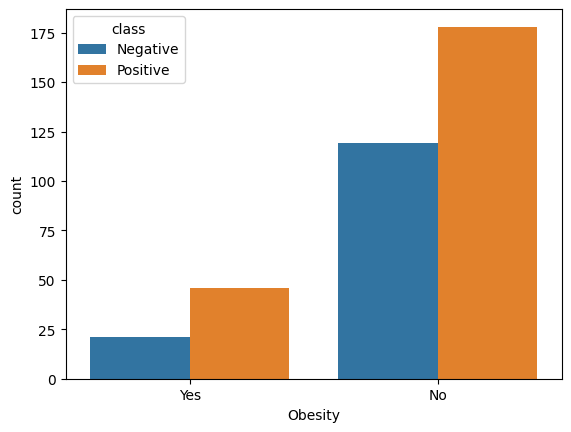

In [ ]:
sns.countplot(data=data_train, x='Obesity', hue='class')

In [ ]:
# Perform the independence test
independence_test('Obesity')

Class and Obesity is independent with P-val=0.23528439996030426.


# Preprocessing Data Training

Data train

Remove outlier in Age, using IQR

In [ ]:
# Calculate Q1 and Q3
Q1_age = np.percentile(data_train['Age'], 25)
Q3_age = np.percentile(data_train['Age'], 75)

# Calculate IQR
IQR_age = Q3_age - Q1_age

# Calculate the thresholds
min_age = Q1_age - 1.5*IQR_age
max_age = Q3_age + 1.5*IQR_age

min_age, max_age

(13.5, 81.5)

In [ ]:
# Define the outliers
outliers_age = np.where(data_train['Age'] > max_age)[0]

# Check the number of outliers in data_imputed
n_outliers = len(outliers_age)
n_outliers

3

In [ ]:
# Check the shape of data_imputed before pre processing
data_train_old = data_train.shape
print('data_train old shape :', data_train_old)

data_train old shape : (364, 17)


In [ ]:
# Create a mask to filter out outliers
outlier_mask = (data_train['Age'] <= max_age)

# Apply the mask to remove outliers
data_clean = data_train[outlier_mask]

In [ ]:
# Check the shape of data_imputed before pre processing
data_train_new = data_clean.shape
print('data_train new shape :', data_train_new)

data_train new shape : (361, 17)


<Axes: xlabel='class', ylabel='Age'>

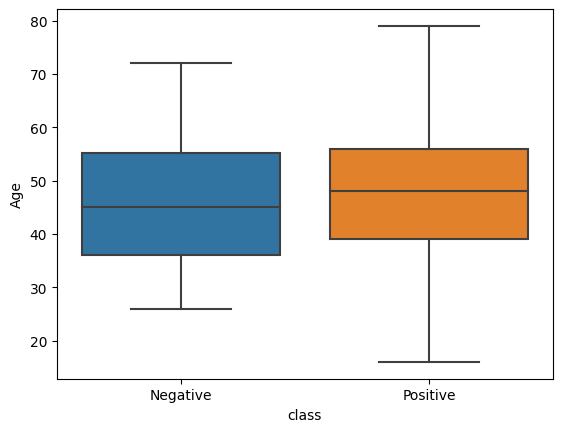

In [ ]:
sns.boxplot(data=data_clean, x='class', y='Age')

Convert categorical predictor with dummy variable

In [ ]:
data_clean.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
# Create dummy variables for gender (1: Male, 0: Female)
data_clean[['Male']] = pd.get_dummies(data_clean['Gender'],
                                      drop_first = True)

<ipython-input-220-cf6b64b04cce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Male']] = pd.get_dummies(data_clean['Gender'],


In [ ]:
# Create dummy variables for Polyuria (1: Yes, 0: No)
data_clean[['Polyuria']] = pd.get_dummies(data_clean['Polyuria'],
                                      drop_first = True)

<ipython-input-221-03d9ae204037>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Polyuria']] = pd.get_dummies(data_clean['Polyuria'],


In [ ]:
# Create dummy variables for Polydipsia (1: Yes, 0: No)
data_clean[['Polydipsia']] = pd.get_dummies(data_clean['Polydipsia'],
                                      drop_first = True)

<ipython-input-222-a54c29623c77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Polydipsia']] = pd.get_dummies(data_clean['Polydipsia'],


In [ ]:
# Create dummy variables for sudden weight loss (1: Yes, 0: No)
data_clean[['sudden weight loss']] = pd.get_dummies(data_clean['sudden weight loss'],
                                      drop_first = True)

<ipython-input-223-40a6596bb2c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['sudden weight loss']] = pd.get_dummies(data_clean['sudden weight loss'],


In [ ]:
# Create dummy variables for weakness (1: Yes, 0: No)
data_clean[['weakness']] = pd.get_dummies(data_clean['weakness'],
                                      drop_first = True)

<ipython-input-224-b711cef48afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['weakness']] = pd.get_dummies(data_clean['weakness'],


In [ ]:
# Create dummy variables for Polyphagia (1: Yes, 0: No)
data_clean[['Polyphagia']] = pd.get_dummies(data_clean['Polyphagia'],
                                      drop_first = True)

<ipython-input-225-dcdf29ae41f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Polyphagia']] = pd.get_dummies(data_clean['Polyphagia'],


In [ ]:
# Create dummy variables for Genital thrush (1: Yes, 0: No)
data_clean[['Genital thrush']] = pd.get_dummies(data_clean['Genital thrush'],
                                      drop_first = True)

<ipython-input-226-01461d39672c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Genital thrush']] = pd.get_dummies(data_clean['Genital thrush'],


In [ ]:
# Create dummy variables for visual blurring (1: Yes, 0: No)
data_clean[['visual blurring']] = pd.get_dummies(data_clean['visual blurring'],
                                      drop_first = True)

<ipython-input-227-7836b2fa7e92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['visual blurring']] = pd.get_dummies(data_clean['visual blurring'],


In [ ]:
# Create dummy variables for Itching (1: Yes, 0: No)
data_clean[['Itching']] = pd.get_dummies(data_clean['Itching'],
                                      drop_first = True)

<ipython-input-228-2b1235803d0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Itching']] = pd.get_dummies(data_clean['Itching'],


In [ ]:
# Create dummy variables for Irritability (1: Yes, 0: No)
data_clean[['Irritability']] = pd.get_dummies(data_clean['Irritability'],
                                      drop_first = True)

<ipython-input-229-99480fefe551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Irritability']] = pd.get_dummies(data_clean['Irritability'],


In [ ]:
# Create dummy variables for delayed healing (1: Yes, 0: No)
data_clean[['delayed healing']] = pd.get_dummies(data_clean['delayed healing'],
                                      drop_first = True)

<ipython-input-230-d46019301793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['delayed healing']] = pd.get_dummies(data_clean['delayed healing'],


In [ ]:
# Create dummy variables for partial paresis (1: Yes, 0: No)
data_clean[['partial paresis']] = pd.get_dummies(data_clean['partial paresis'],
                                      drop_first = True)

<ipython-input-231-fff706f7d140>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['partial paresis']] = pd.get_dummies(data_clean['partial paresis'],


In [ ]:
# Create dummy variables for muscle stiffness (1: Yes, 0: No)
data_clean[['muscle stiffness']] = pd.get_dummies(data_clean['muscle stiffness'],
                                      drop_first = True)

<ipython-input-232-714bfa014eaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['muscle stiffness']] = pd.get_dummies(data_clean['muscle stiffness'],


In [ ]:
# Create dummy variables for Alopecia (1: Yes, 0: No)
data_clean[['Alopecia']] = pd.get_dummies(data_clean['Alopecia'],
                                      drop_first = True)

<ipython-input-233-d0ff6a5317e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Alopecia']] = pd.get_dummies(data_clean['Alopecia'],


In [ ]:
# Create dummy variables for Obesity (1: Yes, 0: No)
data_clean[['Obesity']] = pd.get_dummies(data_clean['Obesity'],
                                      drop_first = True)

<ipython-input-234-bbf4ea2ca0f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['Obesity']] = pd.get_dummies(data_clean['Obesity'],


In [ ]:
# Create dummy variables for class (1: Positive, 0: Negative)
data_clean[['class']] = pd.get_dummies(data_clean['class'],
                                      drop_first = True)

<ipython-input-235-a8fcf2eb7744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[['class']] = pd.get_dummies(data_clean['class'],


In [ ]:
data_clean.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class', 'Male'],
      dtype='object')

In [ ]:
# Redefine the training set
data_clean = data_clean[['Age', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']]

data_clean.head().T

,497,233,116,365,276
Age,47,50,30,45,30
Male,1,1,0,0,1
Polyuria,0,0,1,0,0
Polydipsia,0,0,1,0,0
sudden weight loss,0,0,1,0,0
weakness,0,1,0,0,0
Polyphagia,0,0,1,1,0
Genital thrush,0,0,0,0,0
visual blurring,0,0,0,1,0
Itching,0,1,0,1,0


Data Balancing

In [ ]:
# Describe proportion of Class before balancing
data_clean['class'].value_counts(normalize=False)

1    221
0    140
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

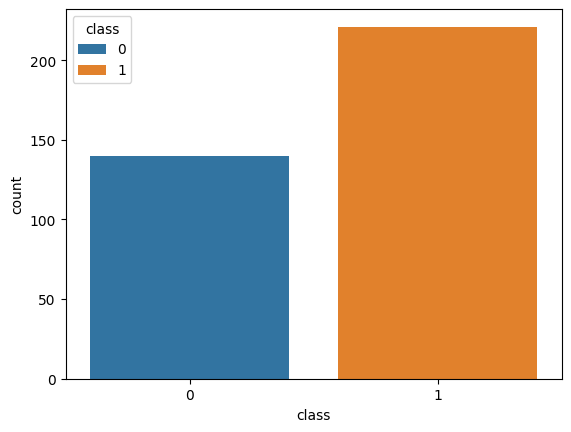

In [ ]:
# Check the proportion before balancing using barplot
sns.countplot(data = data_clean,
              x = response_variable,
              hue = response_variable,
              dodge = False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def ros_fit_resample(data_clean: pd.DataFrame, response_variable) -> pd.DataFrame:

    # Create copy of set data
    data_clean = data_clean.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 42)

    # Balancing data set
    x_ros, y_ros = ros.fit_resample(data_clean.drop([response_variable], axis = 1),
                                    data_clean[response_variable])

    # Concatenate balanced data set
    data_train_ros = pd.concat([x_ros, y_ros], axis = 1)

    # Return balanced data set
    return data_train_ros

In [ ]:
# Perform ROS
data_train_ros = ros_fit_resample(data_clean = data_clean,
                                  response_variable = response_variable)

<Axes: xlabel='class', ylabel='count'>

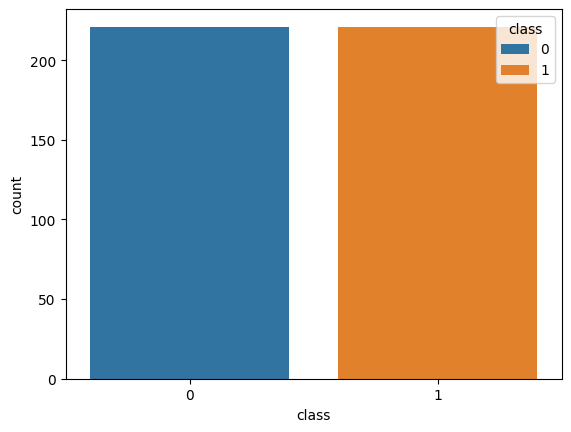

In [ ]:
# Check the proportion of response categories
sns.countplot(data = data_train_ros,
              x = response_variable,
              hue = response_variable,
              dodge = False)

In [ ]:
# Check proportion of Class after balancing
data_train_ros['class'].value_counts(normalize=False)

0    221
1    221
Name: class, dtype: int64

<Axes: >

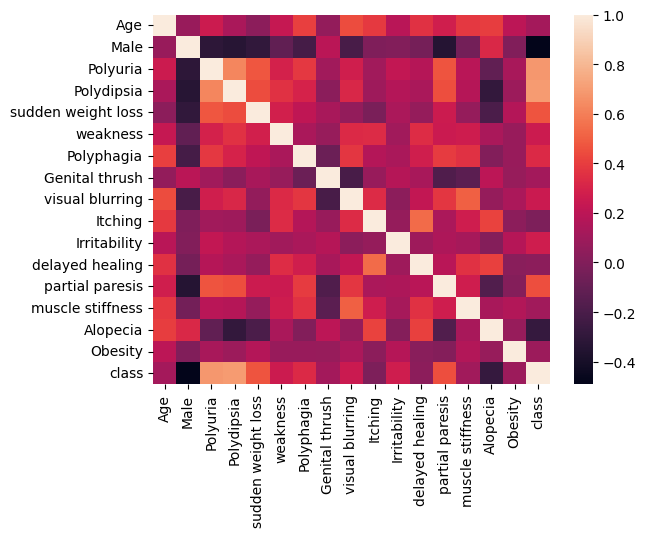

In [ ]:
# Wondering the correlation plot heatmap
corr = data_train_ros.corr()
sns.heatmap(corr)

# Pre-processing Data Test

In [ ]:
# Concatenate X_test and y_test as data_test
data_test = pd.concat((X_test, y_test), axis=1)

# Validate data_test
print('Test data shape:', data_test.shape)

Test data shape: (156, 17)


In [ ]:
# Table check
data_test.head().T

,336,378,252,273,434
Age,42,47,39,45,53
Gender,Male,Male,Female,Male,Male
Polyuria,No,Yes,Yes,No,Yes
Polydipsia,No,Yes,Yes,No,Yes
sudden weight loss,No,No,Yes,No,Yes
weakness,No,No,Yes,No,Yes
Polyphagia,No,No,Yes,Yes,Yes
Genital thrush,No,No,No,Yes,No
visual blurring,No,No,No,No,Yes
Itching,No,No,Yes,No,No


Create Dummies Variable

In [ ]:
# Create dummy variables for gender (1: Male, 0: Female)
data_test[['Male']] = pd.get_dummies(data_test['Gender'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Polyuria (1: Yes, 0: No)
data_test[['Polyuria']] = pd.get_dummies(data_test['Polyuria'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Polydipsia (1: Yes, 0: No)
data_test[['Polydipsia']] = pd.get_dummies(data_test['Polydipsia'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for sudden weight loss (1: Yes, 0: No)
data_test[['sudden weight loss']] = pd.get_dummies(data_test['sudden weight loss'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for weakness (1: Yes, 0: No)
data_test[['weakness']] = pd.get_dummies(data_test['weakness'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Polyphagia (1: Yes, 0: No)
data_test[['Polyphagia']] = pd.get_dummies(data_test['Polyphagia'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Genital thrush (1: Yes, 0: No)
data_test[['Genital thrush']] = pd.get_dummies(data_test['Genital thrush'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for visual blurring (1: Yes, 0: No)
data_test[['visual blurring']] = pd.get_dummies(data_test['visual blurring'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Itching (1: Yes, 0: No)
data_test[['Itching']] = pd.get_dummies(data_test['Itching'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Irritability (1: Yes, 0: No)
data_test[['Irritability']] = pd.get_dummies(data_test['Irritability'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for delayed healing (1: Yes, 0: No)
data_test[['delayed healing']] = pd.get_dummies(data_test['delayed healing'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for partial paresis (1: Yes, 0: No)
data_test[['partial paresis']] = pd.get_dummies(data_test['partial paresis'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for muscle stiffness (1: Yes, 0: No)
data_test[['muscle stiffness']] = pd.get_dummies(data_test['muscle stiffness'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Alopecia (1: Yes, 0: No)
data_test[['Alopecia']] = pd.get_dummies(data_test['Alopecia'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for Obesity (1: Yes, 0: No)
data_test[['Obesity']] = pd.get_dummies(data_test['Obesity'],
                                      drop_first = True)

In [ ]:
# Create dummy variables for class (1: Positive, 0: Negative)
data_test[['class']] = pd.get_dummies(data_test['class'],
                                      drop_first = True)

In [ ]:
data_test.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class', 'Male'],
      dtype='object')

In [ ]:
# Redefine the test set
data_test = data_test[['Age', 'Male', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']]

data_test.head().T

,336,378,252,273,434
Age,42,47,39,45,53
Male,1,1,0,1,1
Polyuria,0,1,1,0,1
Polydipsia,0,1,1,0,1
sudden weight loss,0,0,1,0,1
weakness,0,0,1,0,1
Polyphagia,0,0,1,1,1
Genital thrush,0,0,0,1,0
visual blurring,0,0,0,0,1
Itching,0,0,1,0,0


# Building Logistic Regression Model

Model Selection

In [ ]:
def AIC(y_true, y_pred, p):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    y_true : {array-like} of shape (n_sample, )
        Actual value of response variable.

    y_pred : {array-like} of shape (n_sample, 1)
        The success probability of X.

    p : int
        Number of parameters in model.

    Returns
    -------
    aic : float
        AIC value.
    """
    # Find the average log likelihood value
    llf = np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

    # AIC value is sensitive to number of parameters
    # The average log likelihood represent value for 1 unit observation
    # AIC from average llf is not comparable
    # Multiply llf by n_sample of training set to make its AIC comparable
    llf *= data_clean.shape[0]

    # Calculate AIC
    aic = -2 * (llf - p)

    return aic


In [ ]:
def kfold_split(X, k=5, random_state=42):
    """
    Function to split sample with validation set approach.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    k : int, default = 5
        Number of folds.

    random_state : int
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    train_ind_list : list
        Contains data index of train set.

    valid_ind_list : list
        Contains data index of validation set.
    """
    # Extract sample size
    n_samples, _ = X.shape

    # Set random state
    np.random.seed(random_state)

    # # Randomize index
    random_ind = np.random.choice(n_samples,
                                  size = n_samples,
                                  replace = False)

    # Calculate size of each fold
    fold_sizes = np.ones(k, dtype=int) * (n_samples//k)
    fold_sizes[:n_samples%k] += 1

    # Define initial list for each train and valid index
    train_ind_list = []
    valid_ind_list = []

    # Split sample
    current_ind = 0
    for size in fold_sizes:
        # Define index
        start_ind = current_ind
        end_ind = current_ind + size

        # Slice valid set
        # One fold for valid set, the remaining for train set
        valid_ind = random_ind[start_ind:end_ind]
        train_ind = np.concatenate((random_ind[:start_ind],
                                    random_ind[end_ind:]))

        # Update current index
        current_ind = end_ind

        # Append train and valid index in list
        train_ind_list.append(train_ind)
        valid_ind_list.append(valid_ind)

    return train_ind_list, valid_ind_list


In [ ]:
def cross_validate(X, y, method, cv, class_weight=None, random_state=42):
    """
    Function to evaluate AIC by cross-validation method.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        The independent variable or predictors.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    method : cross-validation splitter
        Cross-validation method.

    cv : int
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    score : float
        The average AIC score.
    """
    # Split train and valid set based on CV method
    if method == "validation_set":
        train_ind_list, valid_ind_list = validation_set_split(X = X,
                                                              random_state = random_state)
    elif method == "loocv":
        train_ind_list, valid_ind_list = loocv_split(X = X)
    elif method == "kfold":
        train_ind_list, valid_ind_list = kfold_split(X = X,
                                                     k = cv,
                                                     random_state = random_state)

    # Define the number of train sets
    n_split = len(train_ind_list)

    # Initialize AIC score list for each valid set
    score_list = []

    for i in range(n_split):
        # Extract data from index
        X_train = X[train_ind_list[i]]
        y_train = y[train_ind_list[i]]
        X_valid = X[valid_ind_list[i]]
        y_valid = y[valid_ind_list[i]]

        # Fitting model
        model = LogisticRegression(penalty = 'none',
                                   class_weight = class_weight)
        model.fit(X_train, y_train)

        # Calculate success probability
        pred_train = model.predict_proba(X_train)
        pred_valid = model.predict_proba(X_valid)

        y_pred_train = pred_train[:,1]
        y_pred_valid = pred_valid[:,1]

        # Calculate AIC
        aic_train = AIC(y_true = y_train,
                        y_pred = y_pred_train,
                        p = X_train.shape[1]+1)
        aic_valid = AIC(y_true = y_valid,
                        y_pred = y_pred_valid,
                        p = X_train.shape[1]+1)

        # Append AIC score in list
        score_list.append(aic_valid)

    # Calculate CV Score
    score = np.mean(score_list)

    return score


In [ ]:
def forward(X, y, predictors, method, cv=5, class_weight=None, random_state=42):
    """
    Function to perform best subset selection procedure.

    Parameters
    ----------
    X : {array-like} of shape (n_sample, n_predictors)
        All predictors set.

    y : {array-like} of shape (n_sample, )
        The dependent or response variable.

    predictors : {array-like} of shape (n_sample, )
        Index of predictors

    method : cross-validation splitter
        Cross-validation method.

    cv : int, default=5
        Number of folds for k-Fold CV.

    random_state : int, default=42
        Pass an int for reproducible output across multiple function calls.

    Returns
    -------
    models : {array-like} of shape (n_combinations, k)
        Summary of predictors and its AIC score for each possible combination.

    best_model : {array-like} of shape (2, )
        Best model of models with the smallest AIC score.
    """

    # Initialize list of results
    results = []

    # Define sample size and  number of all predictors
    n_samples, n_predictors = X.shape

    # Define list of all predictors
    col_list = np.arange(n_predictors)

    # Define remaining predictors for each k
    remaining_predictors = [p for p in col_list if p not in predictors]

    # Initialize list of predictors and its CV Score
    pred_list = []
    score_list = []

    # Cross validate each possible combination of remaining predictors
    for p in remaining_predictors:
        combi = predictors + [p]

        # Extract predictors combination
        X_ = X[:, combi]
        y_ = y

        # Cross validate to get CV Score
        score_ = cross_validate(X = X_,
                                y = y_,
                                method = method,
                                cv = cv,
                                class_weight = class_weight,
                                random_state = random_state)

        # Append predictors combination and its CV Score to the list
        pred_list.append(list(combi))
        score_list.append(score_)

    # Tabulate the results
    models = pd.DataFrame({"Predictors": pred_list,
                            "AIC": score_list})

    # Choose the best model
    best_model = models.loc[models["AIC"].argmin()]

    return models, best_model


In [ ]:
# Split response and predictors
y_train = data_train_ros[response_variable]
X_train = data_train_ros.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

# Validate
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (442, 16)
y_train shape: (442,)


In [ ]:
# Fit null model
predictor = []
score_ = cross_validate(X = X_train[:, [1]],
                        y = y_train,
                        method = 'kfold',
                        cv = 5,
                        random_state = 42)

# Create table for the best model of each k predictors
# Append the results of null model
forward_models = pd.DataFrame({"Predictors": [predictor],
                               "AIC": [score_]})

forward_models

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

,Predictors,AIC
0,[],414.7197


In [ ]:
# Define list of predictors
predictors = []
n_predictors = X_train.shape[1]

# Perform forward selection procedure for k=1,...,13 predictors
for k in range(n_predictors):
    _, best_model = forward(X = X_train,
                            y = y_train,
                            predictors = predictors,
                            method = "kfold",
                            cv = 5,
                            random_state = 42)

    # Tabulate the best model of each k predictors
    forward_models.loc[k+1] = best_model
    predictors = best_model["Predictors"]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

In [ ]:
# Print the best model of each k predictors
forward_models

,Predictors,AIC
0,[],414.719700
1,[3],302.060341
2,"[3, 2]",251.234592
3,"[3, 2, 1]",190.889728
4,"[3, 2, 1, 9]",181.921126
5,"[3, 2, 1, 9, 7]",175.971722
6,"[3, 2, 1, 9, 7, 12]",171.125321
7,"[3, 2, 1, 9, 7, 12, 10]",167.320311
8,"[3, 2, 1, 9, 7, 12, 10, 6]",169.150741
9,"[3, 2, 1, 9, 7, 12, 10, 6, 8]",172.475801


In [ ]:
# Find the best AIC score
best_idx = forward_models['AIC'].argmin()
best_AIC = forward_models['AIC'].loc[best_idx]
best_predictors = forward_models['Predictors'].loc[best_idx]

# print
print('Best index            :', best_idx)
print('Best AIC              :', best_AIC)
print('Best predictors (idx) :', best_predictors)
print('Best predictors       :')
print(data_clean.columns[best_predictors].tolist())

Best index            : 7
Best AIC              : 167.32031107772943
Best predictors (idx) : [3, 2, 1, 9, 7, 12, 10]
Best predictors       :
['Polydipsia', 'Polyuria', 'Male', 'Itching', 'Genital thrush', 'partial paresis', 'Irritability']


In [ ]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
X_train_best = sm.add_constant(X_train_best)
best_model_train = sm.Logit(y_train, X_train_best)
best_model_train = best_model_train.fit()

print(best_model_train.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  442
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                     inf
Time:                        07:20:01   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4021      0.390      1.031      0.302      -0.362       1.166
x1             5.6948      0.825  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# Cross check the classification matrix
# Use method pred_table from Statsmodels
cm = best_model_train.pred_table(threshold = 0.5)

print(cm)

[[205.  16.]
 [ 20. 201.]]


In [ ]:
# Define the components of classification matrix
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
# Calculate accuracy
accuracy = (TP+TN)/(TP+FP+TN+FN)

print(f"Model can correctly predict {accuracy*100:.2f}% of train set outcomes.")

Model can correctly predict 91.86% of train set outcomes.


In [ ]:
# Define X with best predictors
X_train_best = X_train[:, best_predictors]

# Fit best model
best_model_train = LogisticRegression(penalty = 'none',
                                    class_weight = None)
best_model_train.fit(X_train_best, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [ ]:
def predict_train(X_train, y_train, model, predictors):

  # Calculate success probability
  X_train = X_train[:, predictors]
  pred_train = model.predict_proba(X_train_best)
  y_pred_train = pred_train[:,1]

  # Calculate AIC
  aic_train = AIC(y_true = y_train,
                 y_pred = y_pred_train,
                 p = X_train.shape[1]+1)

  # Calculate AUC
  auc = metrics.roc_auc_score(y_true = y_train,
                              y_score = y_pred_train)

  return y_pred_train, round(aic_train, 2), round(auc, 2)


In [ ]:
y_pred_train, aic_train, auc_train = predict_train(X_train = X_train,
                                                      y_train = y_train,
                                                      model = best_model_train,
                                                      predictors = best_predictors)

y_pred_train, aic_train, auc_train

(array([0.28362268, 0.00777031, 0.9999982 , 0.42253202, 0.01574843,
        0.99903999, 0.99990894, 0.99851196, 0.10806096, 0.56109612,
        0.99998972, 0.99945031, 0.01574843, 0.99998972, 0.9991955 ,
        0.99953938, 0.10806096, 0.99998972, 0.99998972, 0.99987311,
        0.97215935, 0.99998405, 0.82629409, 0.99156311, 0.79771607,
        0.00180375, 0.01349773, 0.01574843, 0.99990894, 0.964488  ,
        0.01574843, 0.99998972, 0.86629091, 0.40888837, 0.99945031,
        0.99157562, 0.10806096, 0.00180375, 0.99903999, 0.99990894,
        0.97298629, 0.10806096, 0.08370795, 0.00180375, 0.01574843,
        0.99515364, 0.99980322, 0.01574843, 0.99983173, 0.98692253,
        0.01574843, 0.01574843, 0.04279877, 0.99643719, 0.99998972,
        0.10806096, 0.01574843, 0.14444807, 0.01574843, 0.99998972,
        0.99914778, 0.01349773, 0.9996055 , 0.99585283, 0.99851196,
        0.99542398, 0.99998972, 0.99887754, 0.59919578, 0.99990894,
        0.99515364, 0.01574843, 0.01574843, 0.00

<Axes: ylabel='Count'>

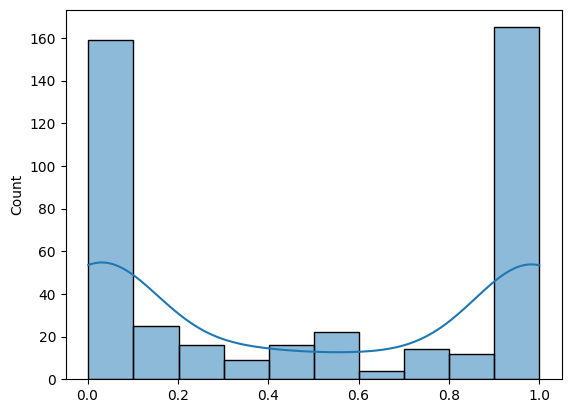

In [ ]:
# Distribution plot of predicted probability
sns.histplot(x = y_pred_train,
             kde = True)

Model Evaluation

In [ ]:
# Split response and predictors
y_test = data_test[response_variable]
X_test = data_test.drop(columns=[response_variable], axis=1)

# Convert dataframe to numpy
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

# Validate
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (156, 16)
y_test shape: (156,)


In [ ]:
def predict_test(X_test, y_test, model, predictors):

  # Calculate success probability
  X_test_best = X_test[:, predictors]
  pred_test = model.predict_proba(X_test_best)
  y_pred_test = pred_test[:,1]

  # Calculate AIC
  aic_test = AIC(y_true = y_test,
                 y_pred = y_pred_test,
                 p = X_test.shape[1]+1)

  # Calculate AUC
  auc = metrics.roc_auc_score(y_true = y_test,
                              y_score = y_pred_test)

  return y_pred_test, round(aic_test, 2), round(auc, 2)


In [ ]:
# Define X with best predictors
X_test_best = X_test[:, best_predictors]

# Fit best model
best_model_test = LogisticRegression(penalty = 'none',
                                    class_weight = None)
best_model_test.fit(X_test_best, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [ ]:
y_pred_test, aic_test, auc_test = predict_test(X_test = X_test,
                                                      y_test = y_test,
                                                      model = best_model_test,
                                                      predictors = best_predictors)

y_pred_test, aic_test, auc_test

(array([6.65402384e-02, 9.99881987e-01, 9.99999801e-01, 1.80507005e-01,
        9.99999801e-01, 6.65402384e-02, 9.75502145e-01, 9.91384377e-01,
        5.50695351e-01, 9.84519662e-01, 9.19437348e-01, 9.99942594e-01,
        9.99984466e-01, 1.80507005e-01, 6.65402384e-02, 9.99999801e-01,
        9.99945801e-01, 9.84519662e-01, 9.99999801e-01, 6.65402384e-02,
        6.65402384e-02, 9.99999801e-01, 9.10217909e-04, 6.65402384e-02,
        9.99999995e-01, 1.80291202e-01, 8.47777419e-01, 9.92420920e-01,
        9.99999263e-01, 6.65402384e-02, 9.99999936e-01, 1.80507005e-01,
        9.99999998e-01, 9.10217909e-04, 9.99999263e-01, 9.99999801e-01,
        9.99998578e-01, 9.99942323e-01, 2.80724320e-03, 9.53872834e-01,
        9.99999642e-01, 6.65402384e-02, 6.65402384e-02, 9.99999801e-01,
        9.99989698e-01, 1.86344442e-03, 6.65402384e-02, 9.99999593e-01,
        5.50695351e-01, 9.99342718e-01, 9.99587761e-01, 9.99999263e-01,
        9.95513667e-01, 9.94929832e-01, 9.99999263e-01, 6.654023

<Axes: ylabel='Count'>

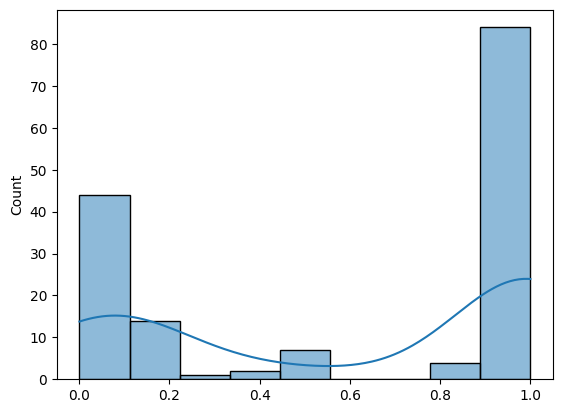

In [ ]:
# Distribution plot of predicted probability
sns.histplot(x = y_pred_test,
             kde = True)

In [ ]:
# Define X with best predictors
X_test_best = X_test[:, best_predictors]

# Fit best model
X_test_best = sm.add_constant(X_test_best)
best_model_test = sm.Logit(y_test, X_test_best)
best_model_test = best_model_test.fit()

print(best_model_test.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  156
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            7
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                     inf
Time:                        07:20:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7173      1.139      1.507      0.132      -0.516       3.950
x1             5.6095      1.868 

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# Cross check the classification matrix
# Use method pred_table from Statsmodels
cm = best_model_test.pred_table(threshold = 0.5)

print(cm)

[[58.  2.]
 [ 6. 90.]]


In [ ]:
# Define the components of classification matrix
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [ ]:
# Calculate accuracy
accuracy = (TP+TN)/(TP+FP+TN+FN)

print(f"Model can correctly predict {accuracy*100:.2f}% of actual outcomes.")

Model 1 can correctly predict 94.87% of actual outcomes.


In [ ]:
def predictive_performance(model_result, threshold=0.5):
    """
    Calculate model's predictive performance

    Parameters
    ----------
    model_result : result of fitted model
        Model result from Statsmodels Logit

    threshold : float in range[0,1], default = 0.5
        Cut-off probability to classify predicted outcome

    Returns
    -------
    accuracy : float
        The accuracy

    sensitivity : float
        The true positive rate

    specificity : float
        The true negative rate
    """
    # Create classificiation matrix from model result
    matrix = model_result.pred_table(threshold)

    # Define the components of classification matrix
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]

    # Calculate metrics from classification matric
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    sensitivity = (TP)/(TP+FN)
    specificity = (TN)/(TN+FP)

    return accuracy, sensitivity, specificity


In [ ]:
# Cross check the predictive performance of Model 1 (X=width)
performa = predictive_performance(model_result = best_model_test,
                                        threshold = 0.5)
# Extract the metrics
accuracy, sensitivity, specificity = performa

In [ ]:
# Print the metrics
print(f"Accuracy    = {accuracy:.4f}")
print(f"Sensitivity = {sensitivity:.4f}")
print(f"Specificity = {specificity:.4f}")

Accuracy    = 0.9487
Sensitivity = 0.9375
Specificity = 0.9667


In [ ]:
# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr1, tpr1, threshold = metrics.roc_curve(y_true = y_test,
                                          y_score = y_pred_test)

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc1 = metrics.roc_auc_score(y_true = y_test,
                             y_score = y_pred_test)
auc1 = round(auc1,4)

In [ ]:
# Calculate sensitivity (TPR) and 1-specificity (FPR) from each possible threshold
fpr2, tpr2, threshold = metrics.roc_curve(y_true = y_train,
                                          y_score = y_pred_train)

# Calculate AUC score using method sklearn.metrics.roc_auc_score
auc2 = metrics.roc_auc_score(y_true = y_train,
                             y_score = y_pred_train)
auc2 = round(auc1,4)

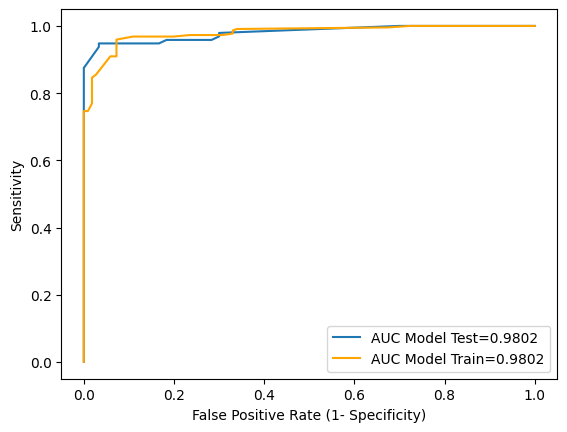

In [ ]:
# Plot ROC AUC Model 1
plt.plot(fpr1, tpr1,
         label = "AUC Model Test="+str(auc1))

# Plot ROC AUC Model 2
plt.plot(fpr2, tpr2,
         label = "AUC Model Train="+str(auc2),
         color = 'orange')

plt.ylabel("Sensitivity")
plt.xlabel("False Positive Rate (1- Specificity)")
plt.legend(loc = 4)
plt.show()